In [2]:
import tkinter as tk
from tkinter import filedialog
import pydicom
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg # insert plt charts into Tkinter
import numpy as np
from matplotlib.widgets import RectangleSelector # function to select area with mouse

In [24]:
cur_image = None
roi_avg_label = None
selector = None

In [34]:
def open_dicom():
    global cur_image, ax, canvas, selector, roi_avg_label
    file_path = filedialog.askopenfilename(title='Select DICOM files', filetypes=[('DICOM files', '*.dcm')])
    if not file_path:  # skip following codes if files are not selected
        return
    # Tkinter mod to open DICOM file
    
    dataset = pydicom.dcmread(file_path)
    cur_image = dataset.pixel_array.astype(np.uint8) # uint8 for stable outcome

    info = f"Patient ID{dataset.get('PatientID', 'N/A')}\n" \
        f"Patient Name{dataset.get('PatientName', 'N/A')}\n" \
        f"Study Date{dataset.get('StudyDate', 'N/A')}\n" \
        f"Study Description{dataset.get('StudyDescription', 'N/A')}"
    # use 'N/A' to prevent from reporting error when data is not available

    info_label.config(text=info) 
    # info will be showed on Tkinter GUI later

    ax.clear() # reset matplotlib AxesSubplot canva
    ax.imshow(cur_image, cmap='grey') # grey scale transformation for medical use
    ax.axis('off') # stop axis from showing in image
    canvas.draw() # show updated matplotlib AxesSubplot canva on Tkinter GUI later
    # above codes for image display
    
    if selector:
        selector.disconnect_events()
    # reset selector to erase previous canva
    
    selector = RectangleSelector(
        ax, onselect,  
        useblit=True,
        button=[1],
        interactive=True # allow user to reselect the ROI area
    )
    canvas.draw()
    # ROI selection function setting

# this callback function will be automatically called by RectangleSelector once area selction is done
# ROI avg intensity tool
def onselect(eclick, erelease):
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    roi = cur_image[y1:y2, x1:x2]
    roi_mean = np.mean(roi)
    roi_avg_label.config(text=f"ROI Average Intensity:{roi_mean:.2f}")

    

In [56]:
def save_as_png():
    if cur_image is None:
        return
    file_path = filedialog.asksaveasfilename(defaultextension='png', filetypes=[('PNG Files', '*.png')])

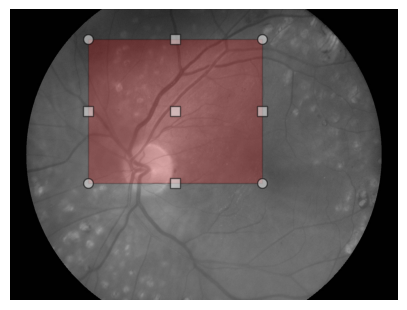

In [58]:
# officially build up a GUI interface for our function
root = tk.Tk()
root.title('DICOM Viewer')

tk.Button(root, text='Open DICOM File', command=open_dicom).pack()
tk.Button(root, text='Save as PNG', comman=save_as_png).pack()
# open file and save file bottoms

info_label = tk.Label(root, text='Info will be shown after opening DICOM file')
info_label.pack()
# a Tkinter label to show patient info we have defined in open_dicom

roi_avg_label = tk.Label(root, text='ROI will be shown after selecting area')
roi_avg_label.pack()
# a Tkinter label to show average ROI for selecting area

fig, ax = plt.subplots(figsize=(5,5)) # define grapical area(fig) and coordinate area(ax)
canvas = FigureCanvasTkAgg(fig, master=root) #transform Matplotlib figure into Tkinter canvas
canvas.get_tk_widget().pack() # put abova canva on GUI

root.mainloop()